Optimización usando el gradiente descendente (GD)
===

* Ultima modificación: Marzo 9, 2021

## Tutoriales en video

* [Interpretación geométrica del gradiente](https://youtu.be/slcnsuw0bk8) 8:44

* [La función de Rosenbrock](https://youtu.be/LsE_-DfNPb8) 8:00

* [Implementación del método del gradiente](https://youtu.be/UBNliFhHgVE) 14:49

## Material de apoyo

### Definición del problema

Encuentre el punto de mínima de la función de Rosenbrock:

$$f(x, y) = 100(x^2 - y)^2 + (1 - x)^2$$

para $x \in [-2.048, 2.048]$ y $y \in [-1.000, 4.000]$

In [1]:
def f(x, y):
    return 100 * (x ** 2 - y) ** 2 + (1 - x) ** 2

Se sabe que el punto de mínima de la función es $f(1.0, 1.0) = 0.0$. Se desea obtener una aproximación al punto de mínima local usando métodos numéricos. La dificultad de esta función permite que pueda ser utilizada para probar métodos numéricos de optimización.

### Minimización numérica usando el método del gradiente descendente

Para realizar la optimización numérica de la función $f(x, y)$ se utiliza el método del gradiente descendente. El proceso es iterativo, tal que a partir de un punto conocido $(x_{k-1}, y_{k-1})$ se obtiene un nuevo punto $(x_k, y_k)$ como:

$$ x_k = x_{k-1} - \mu \frac{d}{dx} f(x_{k-1}, y_{k-1})$$

$$ y_k = y_{k-1} - \mu \frac{d}{dy} f(x_{k-1}, y_{k-1})$$

donde $\mu$ se define como el tamaño de paso o coeficiente de aprendizaje o tasa de aprendizaje.


Si el punto $(x_k, y_k)$ se representa como el vector $\mathbf{w}_k = [x_k, y_k]'$, entonces las dos ecuaciones anteriores son equivalentes a:

$$\mathbf{w}_k = \mathbf{w}_{k-1} - \mu * \frac{\partial}{\partial \mathbf{w}} f(\mathbf{w}_{k-1})$$ 


### Forma de la superficie

La función de Rosenbrock se caracteriza por tener regiones de alta pendiente que rodean un valle casi plano en forma de banana en donde se encuentra ubicado el punto de mínima. Las técnicas basadas en el gradiente bajan rápidamente al valle, pero avanzan lentamente en dirección del mínimo una vez están en él, lo que dificulta el proceso de optimización. 

In [2]:
#
# Preparación
#
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [3]:
#
# Generación de una malla de puntos
# y valor de la función en cada punto
#
X = np.arange(-2.048, 2.048, 0.025)
Y = np.arange(-0.1, 4.0, 0.025)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

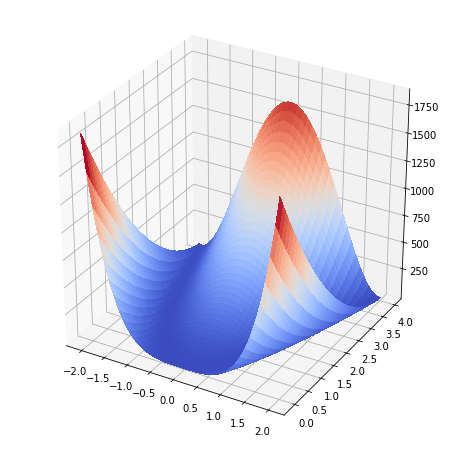

In [4]:
#
# Gráfica de la función
#
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection="3d")
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=1, antialiased=False)
plt.show()

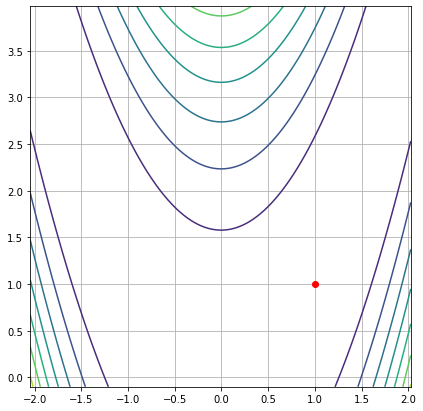

In [5]:
#
# Contorno.
#  El punto rojo señala el punto de mínima
#  de la función
#
def plot_contour():
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_aspect("equal", "box")
    ax.contour(X, Y, Z)
    ax.grid()
    plt.plot([1], [1], "o", color="red")


plot_contour()

### Gradiente algebraico

El gradiente de la función se calcula como:

$$\frac{d}{dx}f(x,y) = 400 x (x^2-y) - 2(1 - x)$$

$$\frac{d}{dy}f(x,y) = -200(x^2 - y)$$

que expresado en forma matricial sería:

$$\frac{\partial}{\partial \mathbf{w}} f(\mathbf{w}_{k-1}) = 
\left[
  \begin{array}{c}
  400 x_{k-1} (x_{k-1}^2-y_{k-1}) - 2(1 - x_{k-1})
  \\
  -200(x_{k-1}^2 - y_{k-1})
  \end{array}
\right]
$$

De esta forma, la función que computa el gradiente se implementa como:

In [6]:
def g(x, y):
    gx = 400 * x * (x ** 2 - y) - 2 * (1 - x)
    gy = -200 * (x ** 2 - y)
    return (gx, gy)

### Proceso iterativo de mejora de los pesos

A partir de las definiciones y cómputos anteriores, es posible implementar el proceso iterativo de mejora de los pesos usando la ecuación:

$$ \mathbf{w}_k = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} f(\mathbf{w}_{k-1})$$

In [7]:
def improve(x, y, mu):
    gx, gy = g(x, y)
    x = x - mu * gx
    y = y - mu * gy
    return (x, y)

### Implementación

Para realizar la optimización numérica se parte de un punto inicial de arranque. Para efectos ilustrativos se supondra que $x_0 = -0.5$ y $y_0 = 3.5$

-1.4364118140162858 2.0707793908964547
5.941728264678629


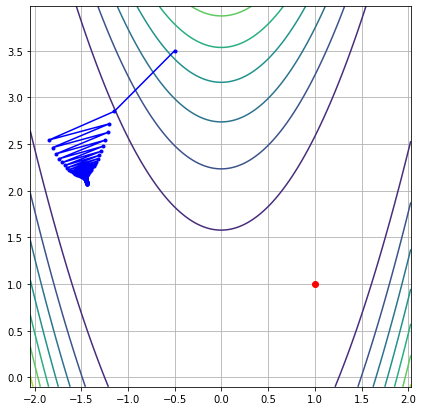

In [8]:
#
# Punto de inicio
#
x = -0.5
y = +3.5

#
#  almacena la historia de los puntos recorridos
#
history_x = [x]
history_y = [y]
history_f = [f(x, y)]

for epoch in range(100):
    x, y = improve(x, y, 0.001)
    history_x.append(x)
    history_y.append(y)
    history_f.append(f(x, y))

plot_contour()
plt.plot(history_x, history_y, ".-", color="blue")
print(x, y)
print(f(x, y))

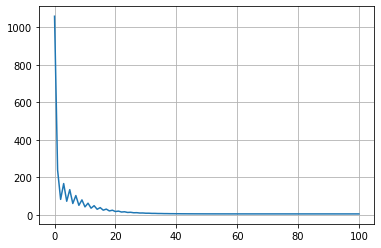

In [9]:
plt.plot(history_f, "-")
plt.grid()

Note que el algoritmo baja rápidamente al valle, y luego empieza a oscilar avanzando realmente muy poco.En las última iteraciones el gradiente es casi cero por lo que avanza aun más lentamente. Esto causa que hayan pocas ganancias en la minimización de la función, tal como se puede apreciar en la segunda gráfica. 

**Ejercicio.---** Cuántas iteraciones se requieren para llegar al punto de óptima: 1000, 2000, ...?

### Opcional --- Implmentación en R

In [10]:
%load_ext rpy2.ipython

#### Función objetivo

$$f(x, y) = 100(x^2 - y)^2 + (1 - x)^2$$

Con $x \in [-2.048, 2.048]$ y $y \in [-1.000, 4.000]$.

In [11]:
%%R
f <-
function(x, y)
{
    100 * (x^2 - y)^2 + (1 - x)^2
}

#### Forma de la superficie de la función

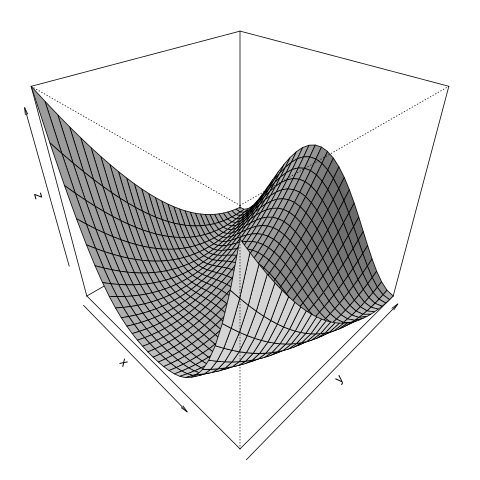

In [12]:
%%R
#
# Esta función permite graficar la función de Rosenbrock
# usando primitivas del lenguaje R
#
f.3D <-
function(t = 45, p = 35, c = "gray85", s = 0.25)
{
    K <- 30
    x <- seq(-2.048, 2.048, 2 * 2.088 / K)
    y <- seq( -1, 4, 5 / K)
    z <- outer(x, y, Vectorize(f))
    palette(gray(0:20 / 20))
    options(repr.plot.width=4, repr.plot.height=4)
    par(mar=c(1,1,1,1))
    persp(x, y, z, theta = t, phi = p, col = c, shade = s)
}
f.3D()

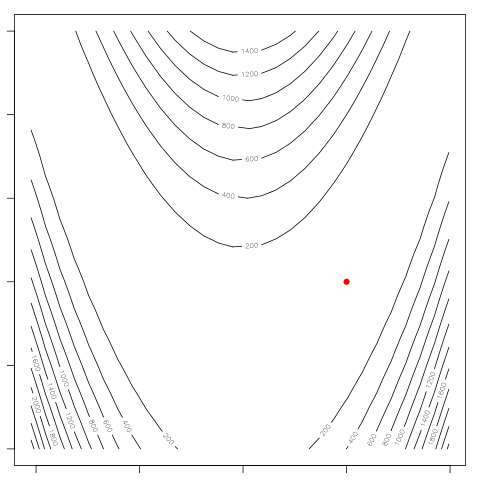

In [13]:
%%R
#
# Contorno
#  El punto rojo señala el punto de mínima
#  de la función
#
f.2D <-
function()
{
    K <- 30
    x <- seq(-2.048, 2.048, 2 * 2.088 / K)
    y <- seq( -1, 4, 5 / K)
    z <- outer(x, y, Vectorize(f))
    options(repr.plot.width=4, repr.plot.height=4)
    par(mar=c(1,1,1,1))
    par(pty="s")
    contour(x, y, z)
    points( 1, 1,  col = "red", pch = 19 )
}
f.2D()

#### Cómputo del gradiente algebraico

In [14]:
%%R
g < -function(x, y)
{c(400 * x * (x ^ 2 - y) - 2 * (1 - x), -200 * (x ^ 2 - y))}

#### Proceso iterativo de mejora de los pesos

In [15]:
%%R
improve <- 
function(xy, mu) {
    gxy <- g(xy[1], xy[2])
    xy[1] <- xy[1] - mu * gxy[1]
    xy[2] <- xy[2] - mu * gxy[2]
    return (xy)
}

#### Algoritmo de optimización

[1] -1.4
[1] 5.941728


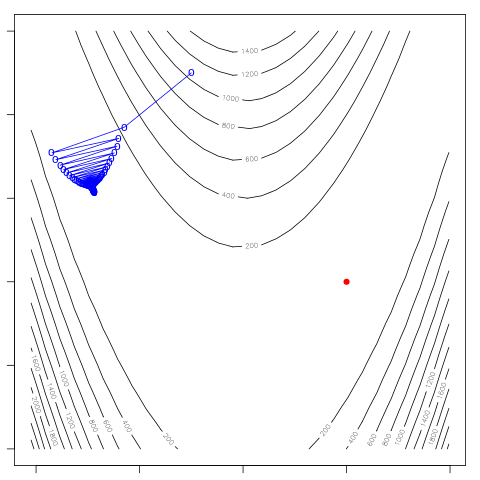

In [16]:
%%R
#
# Punto de inicio
#
x <- -0.5
y <- +3.5

#
#  Almacena la historia de los puntos recorridos
#
history_x <- c(x)
history_y <- c(y)
history_f <- c(f(x, y))

for(epoch in 1:100){
    #
    # Se llama a la función de mejora con una 
    # tasa de aprendizaje de 0.001
    #
    xy = improve(c(x, y), 0.001) 
    x <- xy[1]
    y <- xy[2]
    history_x <- c(history_x, x)
    history_y <- c(history_y, y)
    history_f <- c(history_f, f(x, y))    
}

#
# Se grafica el contorno de la función y 
# los puntos calculados por el algoritmo de 
# optimización
#
f.2D()
lines(history_x, history_y, type='o', pch='o', col='blue');
print(x, y)
print(f(x, y))

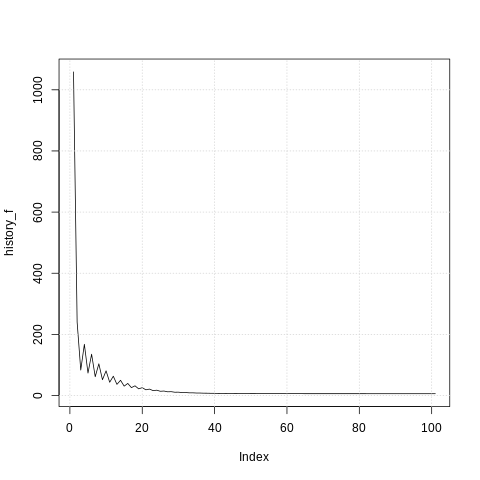

In [17]:
%%R
plot(history_f, type="l")
grid()